## Import Section

In [ ]:
import math

from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from sklearn import metrics
import tensorflow as tf
#from tensorflow.python.data import Dataset

import sys
sys.path.append('../../')

from pygolfdata.data import shotlink

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

%matplotlib inline

## Read Data

Read 2016 Shot Link - Weather data combination and then looking at the sample data, the metadata info, and summary.

In [ ]:
df_ori = shotlink.get_combined_data_from_file(
    '../../golf_course_project_data/combined_shots_and_weather_2016_2016.csv')
df_ori = df_ori.dropna(subset=['StrokesGainedBaseline'])

In [3]:
df_ori.head()

,TourCode,TourDescription,Year,TournamentNum,PlayerNum,CourseNum,PermanentTournamentNum,PlayerFirstName,PlayerLastName,Round,...,Humidity,Visibility,WindBearing,WindGust,WindSpeed,PrecipitationIntensity,PrecipitationType,CourseName_weather,WeatherDateAndHour,TimeDifference
0,R,PGA TOUR,2016,10,24912,552,464,Will,MacKenzie,1,...,0.8,9.7,274.0,nan,3.5,0.0,NaN,Silverado CC (North),2015-10-15 07:00:00,0 days 00:20:00.000000000
1,R,PGA TOUR,2016,10,28158,552,464,Steve,Marino,1,...,0.8,9.7,274.0,nan,3.5,0.0,NaN,Silverado CC (North),2015-10-15 07:00:00,0 days 00:21:00.000000000
2,R,PGA TOUR,2016,10,33419,552,464,Cameron,Tringale,1,...,0.8,9.7,274.0,nan,3.5,0.0,NaN,Silverado CC (North),2015-10-15 07:00:00,0 days 00:21:00.000000000
3,R,PGA TOUR,2016,10,26476,552,464,Chez,Reavie,1,...,0.8,9.7,274.0,nan,3.5,0.0,NaN,Silverado CC (North),2015-10-15 07:00:00,0 days 00:21:00.000000000
4,R,PGA TOUR,2016,10,35451,552,464,Scott,Pinckney,1,...,0.8,9.7,274.0,nan,3.5,0.0,NaN,Silverado CC (North),2015-10-15 07:00:00,0 days 00:22:00.000000000


In [4]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141966 entries, 0 to 1141965
Data columns (total 65 columns):
TourCode                   1141966 non-null object
TourDescription            1141966 non-null object
Year                       1141966 non-null int64
TournamentNum              1141966 non-null int64
PlayerNum                  1141966 non-null int64
CourseNum                  1141966 non-null int64
PermanentTournamentNum     1141966 non-null int64
PlayerFirstName            1141966 non-null object
PlayerLastName             1141966 non-null object
Round                      1141966 non-null int64
TournamentName             1141966 non-null object
CourseName_shots           1141966 non-null object
Hole                       1141966 non-null int64
HoleScore                  1141601 non-null float64
ParValue                   1141966 non-null int64
Yardage                    1141966 non-null int64
Shot                       1141966 non-null int64
ShotType                   11

In [5]:
df_ori.describe()

,Year,TournamentNum,PlayerNum,CourseNum,PermanentTournamentNum,Round,Hole,HoleScore,ParValue,Yardage,...,Hour,Latitude,Longitude,DegreesFahrenheit,Humidity,Visibility,WindBearing,WindGust,WindSpeed,PrecipitationIntensity
count,1141966.0,1141966.0,1141966.0,1141966.0,1141966.0,1141966.0,1141966.0,1141601.0,1141966.0,1141966.0,...,1141966.0,1141966.0,1141966.0,1141966.0,1141966.0,1141966.0,1141781.0,0.0,1141781.0,1141966.0
mean,2016.0,252.2,28060.6,442.5,148.7,2.2,9.5,4.1,4.0,421.1,...,12.9,33.7,-93.6,74.1,0.6,9.6,183.9,nan,7.6,0.0
std,0.0,138.4,7894.2,311.9,206.9,1.1,5.2,0.9,0.6,120.1,...,2.8,5.6,19.3,9.0,0.2,1.0,102.0,nan,4.0,0.0
min,2016.0,10.0,1116.0,4.0,2.0,1.0,1.0,1.0,3.0,106.0,...,7.0,20.7,-157.8,37.0,0.1,2.1,0.0,nan,0.2,0.0
25%,2016.0,140.0,24494.0,24.0,11.0,1.0,5.0,4.0,4.0,387.0,...,11.0,29.9,-98.4,67.1,0.5,9.6,92.0,nan,4.6,0.0
50%,2016.0,250.0,28114.0,538.0,27.0,2.0,10.0,4.0,4.0,442.0,...,13.0,33.6,-86.2,75.9,0.6,9.9,187.0,nan,6.8,0.0
75%,2016.0,370.0,33122.0,715.0,464.0,3.0,14.0,5.0,4.0,490.0,...,15.0,38.3,-80.6,80.8,0.7,10.0,271.0,nan,9.9,0.0
max,2016.0,500.0,50844.0,819.0,518.0,4.0,18.0,11.0,5.0,667.0,...,21.0,43.5,-71.2,92.8,1.0,10.0,359.0,nan,24.0,0.5


## Exploratory Data Analysis

The goal of this project is to explore the effects of weather on StrokesGained, a PGA metric available in the ShotLink dataset. StrokesGained aims to quantify the value of each shot taken by a golfer by comparing it so shots taken from the similar areas and distances. A more in depth explanation is available [here](https://www.pgatour.com/news/2016/05/31/strokes-gained-defined.html). 

Before doing any predictive modeling, we'll first do some exploratory analysis to identify key features. Initially, we'll see how StrokesGained varies with:
- DegreesFahrenheit
- Humidity
- Visibility
- WindSpeed
- PrecipitationIntensity
- PrecipitationType

It's important to note that these factors might affect shot types in different ways. For example, wind might not affect putts in the same way as drives. So we'll often use StrokesGainedCategory to differentiate shot types. 

In [ ]:
#Scatter plot function

def plot_strokes_gained_scatter(df, x_var, by_cat = True):
    '''Creates a scatter plot of StrokesGained vs chosen variable. 
    
    Arguments:
        df (str): input dataframe
        x_var (str): variable to plot against
        by_cat (bool): whether or not to plot by shot category, default = True
    '''
    if by_cat == True:
        sns.lmplot(x = x_var, y = 'StrokesGainedBaseline', col = 'StrokesGainedCategory', data = df,
          fit_reg = False, col_order = ['Off the Tee','Approach to the Green','Around the Green','Putting'])
    else:
        sns.lmplot(x = x_var, y = 'StrokesGainedBaseline', data = df, fit_reg = False,
                  col_order = ['Off the Tee','Approach to the Green','Around the Green','Putting'])

#### StrokesGained vs DegreesFahrenheit

In [ ]:
plot_strokes_gained_scatter(df_ori, 'DegreesFahrenheit')

We see that the variance in StrokesGained tends to narrow at colder temperatures for all categories except putting. However, this could be the effect of not having as much data for colder weather. It also appears that there are less extreme StrokesGained values at hotter temperatures, though again this could be the effect of 

#### StrokesGained vs Humidity

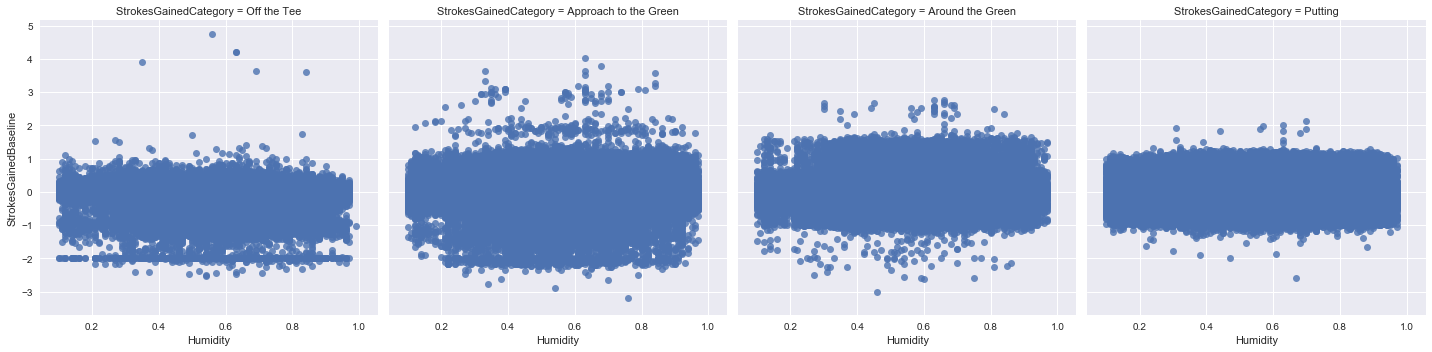

In [8]:
plot_strokes_gained_scatter(df_ori, 'Humidity')

For shots off the tee, there looks to be a very slight negative correlation between humidity and StrokesGained.

#### StrokesGained vs Visibility

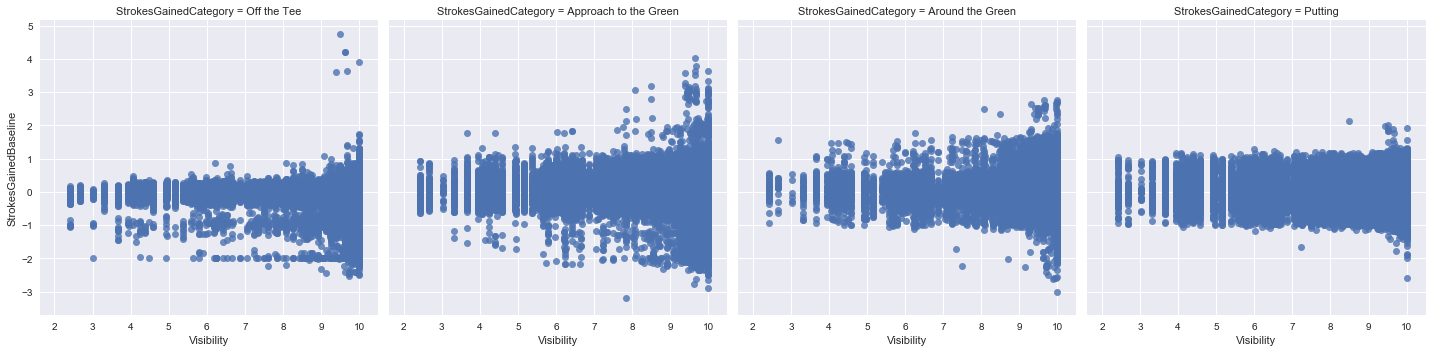

In [10]:
plot_strokes_gained_scatter(df_ori, 'Visibility')

For all shot categories we see a trend of narrowing variance in StrokesGained as visibilty decreases. One might expect a fairly linear negative correlation between visibility and StrokesGained, since it would seem that poor visibility would lead to bad shots. Perhaps this is another case of small sample sizes, or it's possible that in poor visibility golfers take less risks, resulting in more 'average' shots. 

#### StrokesGained vs WindSpeed

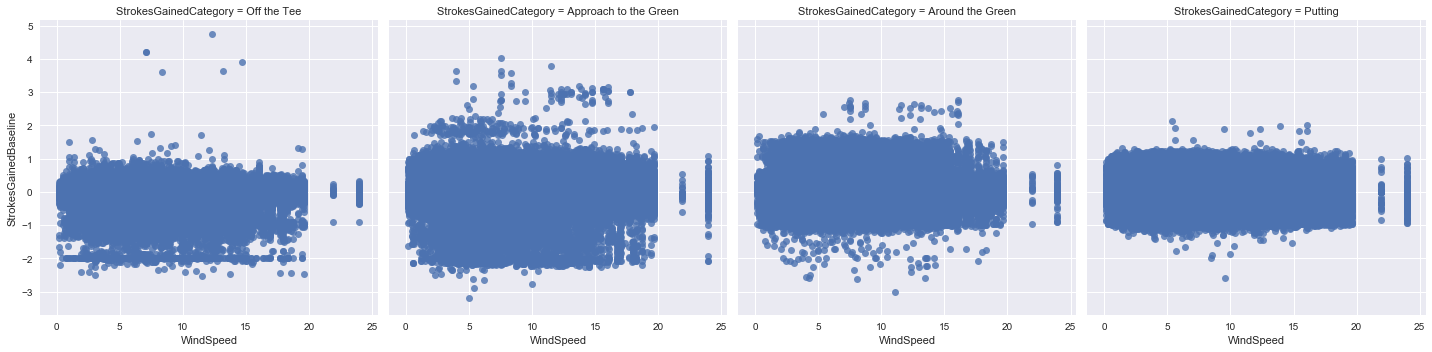

In [11]:
plot_strokes_gained_scatter(df_ori, 'WindSpeed')

#### StrokesGained vs PrecipitationIntensity

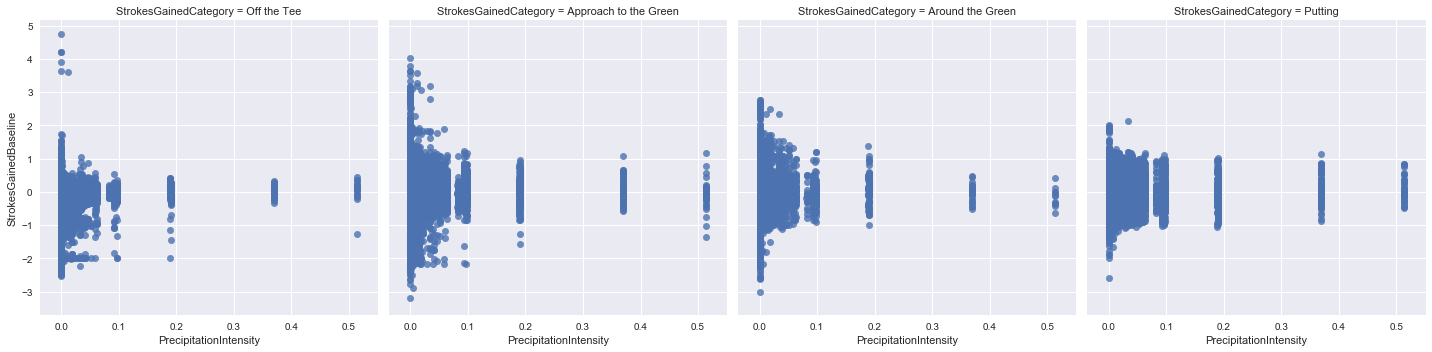

In [12]:
plot_strokes_gained_scatter(df_ori, 'PrecipitationIntensity')

The immediate takeaway from this plot is that the PGA does not like to hold events in any sort of rain. The sample sizes for higher precipitation intensities are very small. However, we see a similar trend to that of visibility. In general, as precipitation intensity increases, the variance in StrokesGained decreases. 

#### StrokesGained vs PrecipitationType

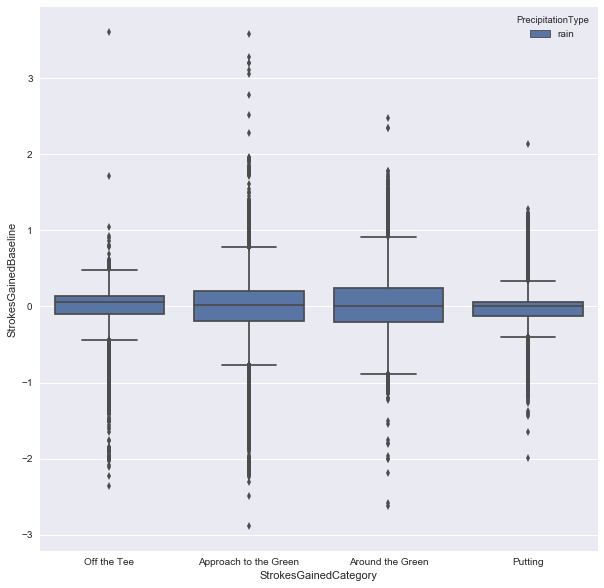

In [14]:
plt.subplots(figsize=(10,10))
sns.boxplot(x = 'StrokesGainedCategory', y = 'StrokesGainedBaseline', hue = 'PrecipitationType', 
            col = 'PrecipitationType' data = df_ori)

#### Correlation Heatmap

In [20]:
heatmap_df = df_ori[['DegreesFahrenheit','Humidity','Visibility','WindSpeed','PrecipitationIntensity',
                     'StrokesGainedBaseline']]

In [ ]:
sns.heatmap(heatmap_df)

## Data cleaning and preparation

First, we deep copy the original dataframe to another dataframe for cleaning and processing purpose.

In [10]:
df = df_ori.copy(deep=True)

Drop columns which have more than 1% of their values missing, then drop rows missing values.

In [11]:
# Drop columns which have more than 1% of their values missing
# Then drop rows missing values

pct_threshold = 0.01
no = df.apply(lambda x: x.isna().sum() / df.shape[0])
drop_these_lame_columns = no[no >= pct_threshold].index

dnew = df.drop(columns=drop_these_lame_columns)

#dnew = dnew.dropna(axis=0, how='any')

In [12]:
dnew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1141966 entries, 0 to 1141965
Data columns (total 52 columns):
TourCode                   1141966 non-null object
TourDescription            1141966 non-null object
Year                       1141966 non-null int64
TournamentNum              1141966 non-null int64
PlayerNum                  1141966 non-null int64
CourseNum                  1141966 non-null int64
PermanentTournamentNum     1141966 non-null int64
PlayerFirstName            1141966 non-null object
PlayerLastName             1141966 non-null object
Round                      1141966 non-null int64
TournamentName             1141966 non-null object
CourseName_shots           1141966 non-null object
Hole                       1141966 non-null int64
HoleScore                  1141601 non-null float64
ParValue                   1141966 non-null int64
Yardage                    1141966 non-null int64
Shot                       1141966 non-null int64
ShotType                   11

In [13]:
dnew = df.dropna(axis=1, how='any')
dnew.columns

Index(['TourCode', 'TourDescription', 'Year', 'TournamentNum', 'PlayerNum',
       'CourseNum', 'PermanentTournamentNum', 'PlayerFirstName',
       'PlayerLastName', 'Round', 'TournamentName', 'CourseName_shots', 'Hole',
       'ParValue', 'Yardage', 'Shot', 'ShotType', 'NumStrokes', 'Distance',
       'DistanceToPin', 'InTheHoleFlag', 'AroundTheGreenFlag',
       'DistanceToHoleAfterShot', 'Time', 'XCoordinate', 'YCoordinate',
       'ZCoordinate', 'DistanceFromCenter', 'DistanceFromEdge', 'Date_shots',
       'StrokesGainedBaseline', 'RecoveryShot', 'ShotDateAndTime',
       'PlayerName', 'Date_weather', 'Hour', 'Latitude', 'Longitude',
       'Summary', 'DegreesFahrenheit', 'Humidity', 'Visibility',
       'PrecipitationIntensity', 'CourseName_weather', 'WeatherDateAndHour',
       'TimeDifference'],
      dtype='object')

In [15]:
col_for_model = ['Summary', 'DegreesFahrenheit', 'Humidity', 'Visibility', 'PrecipitationIntensity', 'StrokesGainedBaseline']
df = dnew[col_for_model]
df = df.dropna(axis=0, how='any')
df.describe()

,DegreesFahrenheit,Humidity,Visibility,PrecipitationIntensity,StrokesGainedBaseline
count,1141966.0,1141966.0,1141966.0,1141966.0,1141966.0
mean,74.1,0.6,9.6,0.0,0.0
std,9.0,0.2,1.0,0.0,0.3
min,37.0,0.1,2.1,0.0,-3.2
25%,67.1,0.5,9.6,0.0,-0.1
50%,75.9,0.6,9.9,0.0,0.0
75%,80.8,0.7,10.0,0.0,0.1
max,92.8,1.0,10.0,0.5,4.8


### Split data into Training & Test

In [16]:
from sklearn import preprocessing, linear_model
from sklearn.model_selection import train_test_split
import copy

response = 'StrokesGainedBaseline'
X = copy.deepcopy(df)
y = X[response]
X = X.drop(columns=response)
X = pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scalerX = preprocessing.StandardScaler().fit(X_train)
scalerY = preprocessing.StandardScaler().fit(y_train.reshape(-1, 1))

X_train_scaled = scalerX.transform(X_train)
X_test_scaled = scalerX.transform(X_test)
y_train_scaled = scalerY.transform(y_train.reshape(-1, 1))
y_test_scaled = scalerY.transform(y_test.reshape(-1, 1))

/Users/radji/miniconda3/envs/dsenv/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':
/Users/radji/miniconda3/envs/dsenv/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  app.launch_new_instance()
/Users/radji/miniconda3/envs/dsenv/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


## Linear Regression

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train_scaled, y_train_scaled)

# Make predictions using the testing set
y_pred = regr.predict(X_test_scaled)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_scaled, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_scaled, y_pred))

Coefficients: 
 [[ 8.01602370e-03  1.47638421e-02  2.60464816e-03 -2.11117837e-03
   3.38091632e+11  8.20789073e+10  4.76830308e+10  2.05297441e+11
   1.14426370e+12  4.62675807e+10  5.19575675e+11  2.12870914e+11
   6.07266323e+10  3.49855090e+11  1.74849879e+11  8.08192974e+10
   3.12875884e+11  2.20283461e+11  9.84117292e+11  1.93795264e+11
   1.59351611e+11]]
Mean squared error: 0.99
Variance score: 0.00


In [18]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV

kf = KFold(n_splits=10, shuffle=True)
alphas = (0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1)
rcv = RidgeCV(alphas=alphas, cv=kf)

rcv.fit(X_train_scaled, y_train_scaled)

RidgeCV(alphas=(0.001, 0.003, 0.006, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1),
    cv=KFold(n_splits=10, random_state=None, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [19]:
y_pred = rcv.predict(X_test_scaled)

# The coefficients
print('Coefficients: \n', rcv.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test_scaled, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test_scaled, y_pred))

Coefficients: 
 [[ 0.00842054  0.0156793   0.00293933 -0.00310603 -0.00566888 -0.00120694
   0.00013321 -0.00650783  0.00016025  0.00343741  0.00012578 -0.00118315
   0.00170048  0.00164353 -0.0016751   0.0002741  -0.00131867 -0.00166654
   0.00297598  0.00172717  0.0018713 ]]
Mean squared error: 0.99
Variance score: 0.00


In [20]:
type(y_test_scaled)
y_pred

array([[-0.01582718],
       [-0.01173705],
       [ 0.00029096],
       ...,
       [-0.00272634],
       [ 0.01141256],
       [ 0.00800229]])

In [21]:
y_test_scaled

array([[ 0.28515591],
       [ 0.48037544],
       [-0.26849948],
       ...,
       [-0.82215486],
       [-0.48292093],
       [-0.00607322]])

### 2nd Attempt Using More Features
As part of the cleaning the data, we lose some interesting features because those have too many Nan values. If we include those features, we might get a better Linear Regression model.

## Use Cases
Data scientists can analyze PGA ShotLink data and weather data, together

### How does the presence of rain affect golfer performance?

### How does intensity of wind affect golfer performance?

### Which golfers are most affected by weather events?